In [ ]:
import pandas as pd
import openpyxl, xlrd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
file_path = "/content/drive/MyDrive/Colab Notebooks/PDAC_data.csv"
print("load file: ", file_path)
pdac_data = pd.read_csv(file_path)

load file:  /content/drive/MyDrive/Colab Notebooks/PDAC_data.csv


In [ ]:
pdac_data.head()

,Patient,Sex,Age,CA19_9,Location,Size,T_stage,N_stage,N_stage8th,Intratumoral_cystic_type,UET1WI,AP,PVP,DP,Diffusion_restriction,ADC_value,Secondary_signs,RFS,Recurrence_site,OS,Magnetic_strength,Machine
0,1,Female,62,92.59,Body,2.1,T2,N0,N0,Neoplastic mucin cyst,Hypo,Hypo,Hypo,Hypo,Pos,1082.0,Neg,49,NaN,51,3.0,Verio
1,2,Male,75,12.82,Body,2.1,T2,N0,N0,Neoplastic mucin cyst,Hypo,Hypo,Hypo,Hypo,Pos,1723.0,Pos,1,NaN,42,3.0,Verio
2,3,Female,65,116.32,Head,2.2,T2,N0,N0,None,Hypo,Hypo,Hypo,Hypo,Pos,1436.0,Neg,1,local,8,3.0,Verio
3,4,Female,82,70.47,Tail,2.1,T2,N0,N0,None,Hypo,Hypo,Hypo,Hypo,Pos,1517.0,Pos,5,liver,20,3.0,Verio
4,5,Male,36,263.70,Head,1.8,T3,N0,N0,None,Hypo,Hypo,Hypo,Hypo,Pos,1465.0,Neg,13,local,17,3.0,Verio


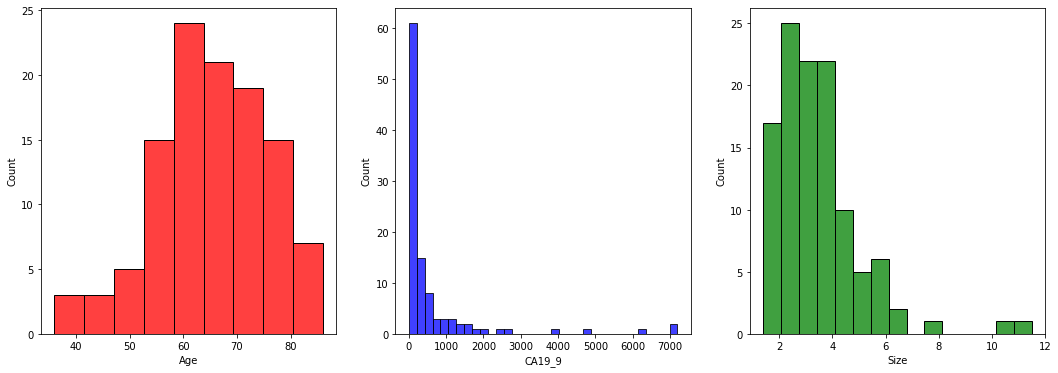

<Figure size 432x288 with 0 Axes>

In [ ]:
## histogram
f, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=False)
sns.histplot(x=pdac_data["Age"], color="red", ax=axes[0])
sns.histplot(x=pdac_data["CA19_9"], color="blue", ax=axes[1])
sns.histplot(x=pdac_data["Size"], color="green", ax=axes[2])
plt.show()
plt.tight_layout()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Neopastic mucin cyst v.s. None: Kruskal-Wallis paired samples with Bonferroni correction, P_val=nan stat=nan
None v.s. Necrosis: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=4.047e-01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Neopastic mucin cyst v.s. None: Kruskal-Wallis paired samples with Bonferroni correction, P_val=nan stat=nan
None v.s. Necrosis: Kruskal-Wallis paired samples with Bonferroni correction, P_val=1.000e+00 stat=4.247e-01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Neopastic mucin cyst v.s. None: Kruskal-Wallis paired samples with Bonfe

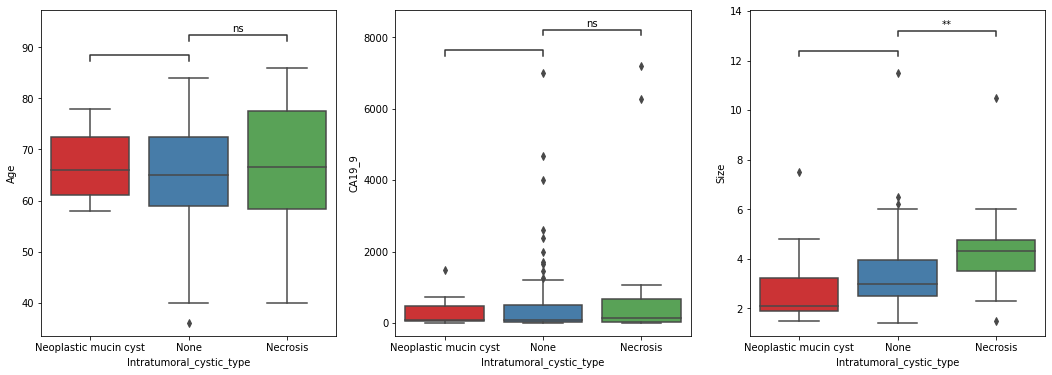

<Figure size 432x288 with 0 Axes>

In [ ]:
# boxplot
!pip install statannot
from statannot import add_stat_annotation

#pdac_data.dropna(subset=['CA19_9'], inplace= True)

order = ['Neopastic mucin cyst', 'None', 'Necrosis']
f2, axes2 = plt.subplots(1, 3, figsize=(18, 6), sharex=False)

sns.boxplot(y = pdac_data['Age'], x = pdac_data['Intratumoral_cystic_type'], ax=axes2[0], palette = 'Set1')#, boxprops={'facecolor':'None'})
#sns.swarmplot(y = pdac_data['Age'], x = pdac_data['Intratumoral_cystic_type'], ax=axes2[0], palette = 'Set1')
add_stat_annotation(axes2[0], data=pdac_data, x=pdac_data['Intratumoral_cystic_type'], y=pdac_data['Age'], order=order,
                    box_pairs=[("None","Neopastic mucin cyst"), ("None", "Necrosis")],
                    test='Kruskal', text_format='star', loc='inside', verbose=1)

sns.boxplot(y = pdac_data['CA19_9'], x = pdac_data['Intratumoral_cystic_type'], ax=axes2[1], palette = 'Set1')
add_stat_annotation(axes2[1], data=pdac_data, x=pdac_data['Intratumoral_cystic_type'], y=pdac_data['CA19_9'], order=order,
                    box_pairs=[("Neopastic mucin cyst", "None"), ("None", "Necrosis")],
                    test='Kruskal', text_format='star', loc='inside', verbose=1)

sns.boxplot(y = pdac_data['Size'], x = pdac_data['Intratumoral_cystic_type'], ax=axes2[2], palette = 'Set1')
add_stat_annotation(axes2[2], data=pdac_data, x=pdac_data['Intratumoral_cystic_type'], y=pdac_data['Size'], order=order,
                    box_pairs=[("Neopastic mucin cyst", "None"), ("None", "Necrosis")],
                    test='Kruskal', text_format='star', loc='inside', verbose=1)

plt.show()
plt.tight_layout()

data: Age and Intratumoral_cystic_type
Kruskal-Wallis chi-squared = 0.8867, df = 2, p-value = 0.64

Comparison of Age by Intratumoral_cystic_type                 
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |   Necrosis   Neoplast
---------+----------------------
Neoplast |  -0.130745
         |     1.0000
         |
    None |   0.660491   0.774781
         |     0.7634     0.6577

data: CA19_9 and Intratumoral_cystic_type
Kruskal-Wallis chi-squared = 0.4591, df = 2, p-value = 0.79


               Comparison of CA19_9 by Intratumoral_cystic_type                
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |   Necrosis   Neoplast
---------+----------------------
Neoplast |   0.537241
         |     0.8867
         |
    None |   0.656510  -0.048535
         |     0.7672     1.0000


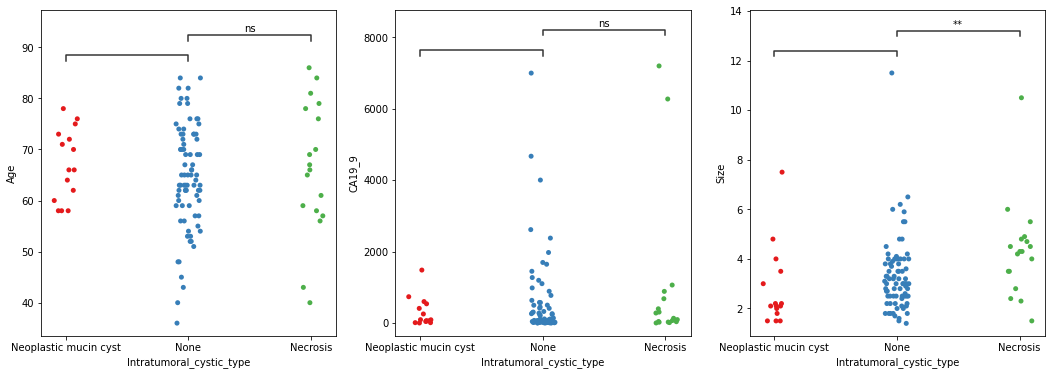

<Figure size 432x288 with 0 Axes>

In [ ]:
order = ['Neopastic mucin cyst', 'None', 'Necrosis']
f3, axes3 = plt.subplots(1, 3, figsize=(18, 6), sharex=False)

sns.stripplot(y = pdac_data['Age'], x = pdac_data['Intratumoral_cystic_type'], ax=axes3[0], palette = 'Set1')
add_stat_annotation(axes3[0], data=pdac_data, x=pdac_data['Intratumoral_cystic_type'], y=pdac_data['Age'], order=order,
                    box_pairs=[("Neopastic mucin cyst", "None"), ("None", "Necrosis")],
                    test='Kruskal', text_format='star', loc='inside', verbose=0)

sns.stripplot(y = pdac_data['CA19_9'], x = pdac_data['Intratumoral_cystic_type'], ax=axes3[1], palette = 'Set1')
add_stat_annotation(axes3[1], data=pdac_data, x=pdac_data['Intratumoral_cystic_type'], y=pdac_data['CA19_9'], order=order,
                    box_pairs=[("Neopastic mucin cyst", "None"), ("None", "Necrosis")],
                    test='Kruskal', text_format='star', loc='inside', verbose=0)

sns.stripplot(y = pdac_data['Size'], x = pdac_data['Intratumoral_cystic_type'], ax=axes3[2], palette = 'Set1')
add_stat_annotation(axes3[2], data=pdac_data, x=pdac_data['Intratumoral_cystic_type'], y=pdac_data['Size'], order=order,
                    box_pairs=[("Neopastic mucin cyst", "None"), ("None", "Necrosis")],
                    test='Kruskal', text_format='star', loc='inside', verbose=0)

plt.show()
plt.tight_layout()

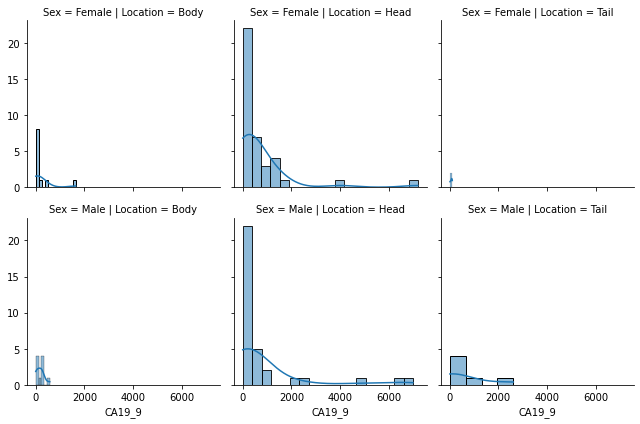

In [ ]:
sns.FacetGrid(pdac_data, col = 'Location', row = 'Sex').map(sns.histplot, 'CA19_9', kde=True)

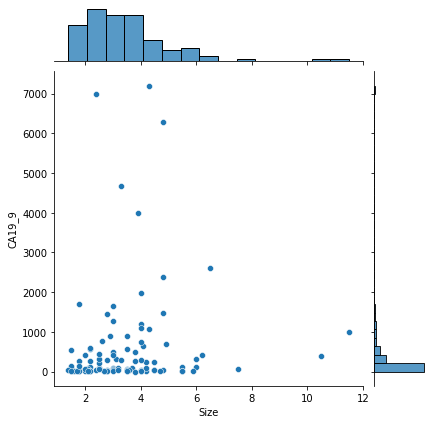

In [ ]:
sns.jointplot(x=pdac_data['Size'], y=pdac_data['CA19_9'], kind = 'scatter')

In [ ]:
!pip install --upgrade plotly

In [ ]:
import plotly.express as px
import numpy as np
pdac_data2 = pdac_data.dropna(subset=['CA19_9'])
fig = px.treemap(pdac_data2, path=[px.Constant("all"), 'Intratumoral_cystic_type', 'Location', 'Patient'], values='CA19_9',
                  color='Size',
                  color_continuous_scale='RdBu',
                  )#color_continuous_midpoint=np.average(pdac_data2['CA19_9'], weights=pdac_data2['Size']))
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()